### Paralelismo de datos

El paralelismo de datos es una técnica de computación paralela donde se divide un conjunto de datos en partes más pequeñas que pueden ser procesadas simultáneamente por múltiples procesadores o núcleos de procesamiento. A diferencia del paralelismo de tareas, donde diferentes tareas o funciones son ejecutadas en paralelo, el paralelismo de datos se centra en aplicar la misma operación a diferentes fragmentos de datos de manera concurrente. Esta técnica es particularmente efectiva en aplicaciones que involucran grandes volúmenes de datos y operaciones repetitivas.

**Conceptos fundamentales**:

División de datos:

- Segmentación: Los datos se segmentan en bloques que pueden ser procesados independientemente. Por ejemplo, en el procesamiento de imágenes, una imagen puede dividirse en múltiples segmentos, y cada segmento puede ser procesado por un núcleo diferente.
- Distribución: Los datos segmentados se distribuyen entre los procesadores disponibles. Esta distribución debe ser balanceada para asegurar que cada procesador tenga una cantidad similar de trabajo, minimizando así el tiempo total de ejecución.

Operaciones similares:

- Aplicación de la misma operación: Cada procesador aplica la misma operación a su segmento de datos. Esto es eficiente en algoritmos como el procesamiento de matrices, transformadas de Fourier, y en la mayoría de las operaciones aritméticas en vectores.
- Independencia de los datos: Las operaciones deben ser independientes entre sí para evitar conflictos y asegurar que no se necesiten sincronizaciones complejas.
 

**Implementaciones y arquitecturas**

Vectorización:

- Procesadores SIMD (Single Instruction, Multiple Data): En estos procesadores, una sola instrucción es aplicada a múltiples datos simultáneamente. SIMD es común en unidades de procesamiento gráfico (GPU) y en algunas extensiones de conjuntos de instrucciones de CPU como SSE (Streaming SIMD Extensions) y AVX (Advanced Vector Extensions).
- Ejemplos: Operaciones como la suma de vectores, multiplicación de matrices, y filtrado de imágenes se benefician enormemente de la vectorización.

Arquitectura de memoria compartida:

- Multiprocesadores de memoria compartida: En estas arquitecturas, múltiples procesadores comparten una única memoria principal. La sincronización y la coherencia de caché son críticas en estos sistemas para asegurar que todos los procesadores trabajen con datos consistentes.
- OpenMP: Es una API para programación paralela en sistemas de memoria compartida. Permite a los programadores especificar de manera sencilla las partes del código que deben ser paralelizadas.

Arquitectura de memoria distribuida:

- Clusters y grids: En sistemas de memoria distribuida, cada procesador tiene su propia memoria local. Los datos deben ser explícitamente enviados entre procesadores, generalmente mediante un mecanismo de paso de mensajes.
- MPI (Message Passing Interface): Es un estándar para la programación paralela en sistemas de memoria distribuida. Permite la comunicación eficiente entre procesos que se ejecutan en diferentes nodos de un cluster.

**Aplicaciones y ejemplos**

Procesamiento de imágenes:

- Filtrado y Transformaciones: Operaciones como la convolución y las transformadas de Fourier en imágenes se pueden paralelizar dividiendo la imagen en bloques y aplicando la operación a cada bloque simultáneamente.
- Ejemplo práctico: En el procesamiento de video, cada cuadro puede ser segmentado y procesado en paralelo para efectos como el suavizado, la detección de bordes, y la compresión.

Computación científica:

- Simulaciones: Simulaciones de sistemas físicos, como dinámica molecular o simulaciones de clima, pueden paralelizarse dividiendo el espacio físico en subregiones, cada una procesada en paralelo.
- Ejemplo práctico: En una simulación de dinámica de fluidos, el dominio de simulación puede dividirse en celdas, y el cálculo del flujo en cada celda se realiza en paralelo.

Big Data y análisis de datos:

- MapReduce: Es un modelo de programación que permite el procesamiento de grandes conjuntos de datos en paralelo. Los datos se dividen en fragmentos y se procesan en paralelo mediante funciones de mapeo y reducción.
- Ejemplo práctico: Procesos de ETL (Extract, Transform, Load) en bases de datos grandes se benefician del paralelismo de datos para extraer, transformar y cargar datos de manera eficiente.

**Desafíos y consideraciones**

Equilibrio de carga:

- Desbalanceo de carga: Un desafío importante en el paralelismo de datos es asegurar que todos los procesadores tengan una cantidad equitativa de trabajo. Si algunos procesadores terminan antes que otros, los recursos no se utilizan de manera eficiente.
- Técnicas de equilibrio: Estrategias como el balanceo dinámico de carga y la redistribución de datos en tiempo de ejecución pueden ayudar a mitigar este problema.

Comunicación y sincronización:

- Latencia y ancho de banda: En arquitecturas de memoria distribuida, la latencia de comunicación y el ancho de banda son factores críticos. Una comunicación excesiva puede reducir significativamente los beneficios del paralelismo.
- Barreras y sincronización: La necesidad de sincronización entre procesadores puede introducir esperas y reducir la eficiencia. El diseño de algoritmos debe minimizar estas sincronizaciones.

Coherencia de memoria:

- Incoherencia de caché: En sistemas de memoria compartida, mantener la coherencia de caché es esencial para asegurar que todos los procesadores trabajen con datos actualizados.
- Protocolos de coherencia: Protocolos como MESI (Modified, Exclusive, Shared, Invalid) y MOESI (Modified, Owner, Exclusive, Shared, Invalid) se utilizan para gestionar la coherencia de caché.

#### Ejercicios de paralelismo de datos


Ejercicio 1: Procesamiento paralelo de imágenes con OpenCV y Multiprocessing
Descripción: Divide una imagen en varios segmentos y aplica un filtro (por ejemplo, filtro de desenfoque) a cada segmento en paralelo usando el módulo multiprocessing.

Tareas:

- Cargar una imagen utilizando OpenCV.
- Dividir la imagen en segmentos.
- Aplicar un filtro de desenfoque a cada segmento en paralelo.
- Unir los segmentos procesados y guardar la imagen resultante.

Pistas:

- Usa cv2.imread para cargar la imagen.
- Usa multiprocessing.Pool para el procesamiento paralelo.
- Usa numpy.hstack o numpy.vstack para unir los segmentos procesados.

In [2]:
import cv2
import numpy as np
from multiprocessing import Pool

def apply_blur(segment):
    return cv2.GaussianBlur(segment, (15, 15), 0)

def parallel_image_processing(image_path):
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    segments = np.array_split(image, 4, axis=1)

    with Pool(processes=4) as pool:
        blurred_segments = pool.map(apply_blur, segments)

    blurred_image = np.hstack(blurred_segments)
    cv2.imwrite('blurred_image.jpg', blurred_image)

parallel_image_processing('/home/seia/Pictures/Screenshot from 2024-04-03 16-28-42.png')


In [4]:
## Tus respuestas
# lo que cambiaria es la verificacion de cores del cpu, confirmar que tenemos la images
# posterior a ello mencionar que se hizo la operacion correspondiente.

## libraries
import cv2
import numpy as np
from multiprocessing import Pool, cpu_count

def apply_blur(segment, kernel_size=(15,15), sigma=3): # el valor de sigma pequeno el desnfoque es mas sutil
    return cv2.GaussianBlur(segment, kernel_size, sigma)

def parallel_image_processing(image_path, num_segments = 0):
    image = cv2.imread(image_path)
    
    #coprobamos que haya cargado la imagen
    if image is None:
        print(f'failed to load image from {image_path}')
        return
    
    height, width, _ = image.shape

    # cpu cores
    #print(num_segments)

    if not num_segments:
        # usamos solo el 80% de los cores 
        num_segments = int(cpu_count() * (80/100))# Default to number of CPU cores
        print(f'using {num_segments} cores')

    # Split image into segments
    segments = np.array_split(image, num_segments, axis=1)

    # parallel processing
    with Pool(processes=num_segments) as pool:
        blurred_segments = pool.map(apply_blur, segments)

    blurred_image = np.hstack(blurred_segments)
    cv2.imwrite('blurred_image.jpg', blurred_image)
    print("Image processing completed and saved as 'blurred_image.jpg'.")

parallel_image_processing('/home/seia/Pictures/Screenshot from 2024-04-03 16-28-42.png')    

0
using 6 cores
Image processing completed and saved as 'blurred_image.jpg'.


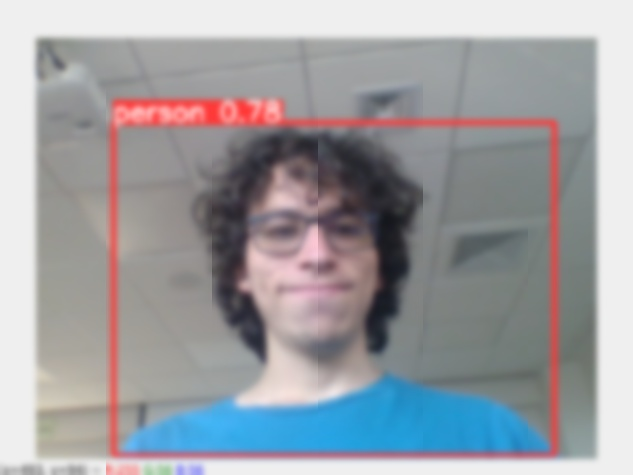

Ejercicio 2: Paralelización de operaciones matriciales con NumPy y Joblib

Descripción: Paraleliza una serie de operaciones matriciales (multiplicación de matrices) utilizando Joblib.

Tareas:

- Crear dos matrices grandes con numpy.
- Dividir las matrices en sub-matrices.
- Multiplicar las sub-matrices en paralelo utilizando Joblib.
- Reunir los resultados y formar la matriz resultante.

Pistas:

- Usa numpy.split para dividir las matrices.
- Usa joblib.Parallel y joblib.delayed para el procesamiento paralelo.

In [10]:
import numpy as np
from joblib import Parallel, delayed

def multiply_sub_matrices(A, B):
    return np.dot(A, B)

def parallel_matrix_multiplication():
    A = np.random.rand(1000, 1000)
    B = np.random.rand(1000, 1000)
    # la matriz se divide en 4 partes 
    A_subs = np.array_split(A, 4, axis=0) # a lo largo de las filas 
    B_subs = np.array_split(B, 4, axis=1) # a lo largo de las columnas

    results = Parallel(n_jobs=4)(delayed(multiply_sub_matrices)(A_sub, B_sub) for A_sub in A_subs for B_sub in B_subs)
    
    C = np.zeros((1000, 1000))

    segment_size = 250
    for i, res in enumerate(results):
        # C[i*250:(i+1)*250, :] = res # se rellena la matriz

        #mis cambios
        row_idx = (i // 4) * segment_size  # Calcula el índice de fila correcto
        col_idx = (i % 4) * segment_size  # Calcula el índice de columna correcto
        C[row_idx:row_idx+segment_size, col_idx:col_idx+segment_size] = res
    return C

parallel_matrix_multiplication()



array([[238.08281147, 257.8363807 , 248.59698433, ..., 249.31628179,
        257.73716049, 248.57666482],
       [240.96746669, 253.41458055, 245.61488821, ..., 252.15752049,
        260.49093639, 248.75875503],
       [242.12984126, 254.93104831, 247.59821326, ..., 245.00186131,
        261.46267285, 252.47511924],
       ...,
       [223.69676489, 243.44041342, 234.4968065 , ..., 233.9626202 ,
        244.80485441, 239.91255538],
       [239.65099343, 253.49377716, 245.2375823 , ..., 247.96992967,
        257.69234765, 246.96569954],
       [244.10154472, 257.81885872, 259.21897115, ..., 258.19467656,
        263.76493443, 258.50999396]])

In [8]:
## Tus respuestas

NameError: name 'c' is not defined

Ejercicio 3: Procesamiento paralelo de archivos con Dask

Descripción: Utiliza Dask para procesar un conjunto de archivos CSV en paralelo, realizando una agregación (por ejemplo, promedio de una columna específica).

Tareas:

- Leer varios archivos CSV con Dask.
- Procesar los archivos en paralelo para calcular el promedio de una columna específica.
- Combinar los resultados y obtener el promedio total.

Pistas:

- Usa dask.dataframe.read_csv para leer los archivos.
- Usa dask.dataframe para realizar las operaciones en paralelo.

In [ ]:
import dask.dataframe as dd

def parallel_csv_processing(file_paths):
    df = dd.read_csv(file_paths)
    average_value = df['target_column'].mean().compute()
    return average_value

file_paths = ['file1.csv', 'file2.csv', 'file3.csv', 'file4.csv']
average = parallel_csv_processing(file_paths)
print(f"Average value: {average}")


In [ ]:
## Tus respuestas

Ejercicio 4: Multiplicación de matrices paralela con OpenMP
Descripción: Implementa la multiplicación de matrices utilizando OpenMP para paralelizar el cálculo.

Tareas:

- Crear dos matrices grandes.
- Paralelizar la multiplicación de matrices utilizando directivas de OpenMP.
- Compilar y ejecutar el programa en un sistema con múltiples núcleos.

Pistas:

- Usa #pragma omp parallel for para paralelizar los bucles.


In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include <omp.h>

void parallel_matrix_multiplication(int N) {
    int i, j, k;
    double **A = (double **)malloc(N * sizeof(double *));
    double **B = (double **)malloc(N * sizeof(double *));
    double **C = (double **)malloc(N * sizeof(double *));
    for (i = 0; i < N; i++) {
        A[i] = (double *)malloc(N * sizeof(double));
        B[i] = (double *)malloc(N * sizeof(double));
        C[i] = (double *)malloc(N * sizeof(double));
        for (j = 0; j < N; j++) {
            A[i][j] = rand() % 100;
            B[i][j] = rand() % 100;
            C[i][j] = 0.0;
        }
    }

    #pragma omp parallel for private(i, j, k) shared(A, B, C)
    for (i = 0; i < N; i++) {
        for (j = 0; j < N; j++) {
            for (k = 0; k < N; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }

    // Imprimir una pequeña parte de la matriz resultado
    for (i = 0; i < 5; i++) {
        for (j = 0; j < 5; j++) {
            printf("%f ", C[i][j]);
        }
        printf("\n");
    }

    for (i = 0; i < N; i++) {
        free(A[i]);
        free(B[i]);
        free(C[i]);
    }
    free(A);
    free(B);
    free(C);
}

int main() {
    int N = 1000;
    parallel_matrix_multiplication(N);
    return 0;
}


Ejercicio 5: Suma paralela de un vector con Pthreads

Descripción: Implementa la suma de los elementos de un vector utilizando pthread para paralelizar el cálculo.

Tareas:

- Crear un vector grande.
- Dividir el vector en segmentos y asignar cada segmento a un hilo diferente.
- Utilizar pthread para realizar la suma en paralelo y combinar los resultados.

Pistas:

- Usa pthread_create y pthread_join para gestionar los hilos.

In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include <pthread.h>

#define NUM_THREADS 4
#define VECTOR_SIZE 1000000

typedef struct {
    int start;
    int end;
    double *vector;
    double sum;
} ThreadData;

void *partial_sum(void *arg) {
    ThreadData *data = (ThreadData *)arg;
    data->sum = 0.0;
    for (int i = data->start; i < data->end; i++) {
        data->sum += data->vector[i];
    }
    pthread_exit(NULL);
}

int main() {
    double *vector = (double *)malloc(VECTOR_SIZE * sizeof(double));
    for (int i = 0; i < VECTOR_SIZE; i++) {
        vector[i] = rand() % 100;
    }

    pthread_t threads[NUM_THREADS];
    ThreadData thread_data[NUM_THREADS];
    int segment_size = VECTOR_SIZE / NUM_THREADS;

    for (int i = 0; i < NUM_THREADS; i++) {
        thread_data[i].start = i * segment_size;
        thread_data[i].end = (i == NUM_THREADS - 1) ? VECTOR_SIZE : (i + 1) * segment_size;
        thread_data[i].vector = vector;
        pthread_create(&threads[i], NULL, partial_sum, (void *)&thread_data[i]);
    }

    double total_sum = 0.0;
    for (int i = 0; i < NUM_THREADS; i++) {
        pthread_join(threads[i], NULL);
        total_sum += thread_data[i].sum;
    }

    printf("Total sum: %f\n", total_sum);
    free(vector);
    return 0;
}

In [ ]:
## Tus respuestas

### Paralelismo de tareas

El paralelismo de tareas es una técnica de computación paralela que se enfoca en dividir un problema en múltiples tareas independientes que pueden ejecutarse simultáneamente. A diferencia del paralelismo de datos, donde la misma operación se aplica a diferentes fragmentos de datos, el paralelismo de tareas permite que distintas operaciones o funciones se ejecuten en paralelo. Esta técnica es particularmente útil en aplicaciones donde las tareas son naturalmente independientes o pueden descomponerse en sub-tareas que no dependen entre sí.


**Conceptos fundamentales**

Descomposición de tareas:

- División del problema: El primer paso en el paralelismo de tareas es dividir el problema en tareas más pequeñas que pueden ejecutarse de manera independiente. Esta división debe hacerse de tal manera que minimice la dependencia y maximice la paralelización.
- Granularidad: La granularidad se refiere al tamaño de las tareas. Las tareas gruesas son grandes y pueden ser pocas, mientras que las tareas finas son pequeñas y numerosas. Un equilibrio adecuado es esencial para maximizar la eficiencia y minimizar el overhead de gestión.

**Asignación de tareas:**

- Distribución dinámica vs. estática: En una asignación estática, las tareas se distribuyen a los procesadores de manera fija antes de la ejecución. En una asignación dinámica, las tareas se asignan a medida que los procesadores se desocupen, lo cual puede ayudar a equilibrar la carga.
- Balanceo de carga: El balanceo de carga asegura que todas las unidades de procesamiento tengan una cantidad equitativa de trabajo, evitando que algunos procesadores estén inactivos mientras otros están sobrecargados.

**Sincronización y comunicación:**

- Sincronización de tareas: Aunque las tareas son independientes, puede ser necesario sincronizarlas en ciertos puntos para asegurar que las dependencias se manejan correctamente.
- Comunicación entre tareas: En sistemas donde las tareas deben intercambiar datos, la comunicación debe ser eficiente para minimizar el overhead y evitar cuellos de botella.

**Implementaciones y arquitecturas**

Procesadores Multinúcleo:

- Multiprocesadores de memoria compartida: En sistemas con múltiples núcleos en un solo chip, las tareas se pueden distribuir entre los núcleos. Estos sistemas se benefician de un acceso rápido a una memoria compartida.
- Herramientas de programación: OpenMP es una de las herramientas más utilizadas para paralelizar tareas en sistemas de memoria compartida. Permite la paralelización de bucles y la creación de secciones paralelas de código.

Clusters y grids:

- Sistemas de memoria distribuida: En un cluster, cada nodo tiene su propia memoria, y las tareas se distribuyen entre los nodos. La comunicación entre nodos se realiza mediante mensajes.

- Message passing interface (MPI): Es el estándar para la programación en memoria distribuida. Facilita la creación de programas que pueden ejecutar tareas en paralelo en diferentes nodos de un cluster.

**Sistemas híbridos**

- Combinación de memoria compartida y distribuida: Algunos sistemas combinan ambos enfoques, utilizando memoria compartida dentro de un nodo y comunicación mediante mensajes entre nodos.
- Modelos de programación híbridos: Herramientas como MPI+OpenMP permiten aprovechar las ventajas de ambos modelos, distribuyendo tareas a nivel de nodo y paralelizándolas dentro de cada nodo.

**Aplicaciones y ejemplos**

Servidores web:

- Manejo de solicitudes concurrentes: En un servidor web, cada solicitud de cliente puede ser manejada como una tarea independiente. Esto permite al servidor procesar múltiples solicitudes al mismo tiempo, mejorando la capacidad de respuesta.
- Ejemplo práctico: Un servidor Apache puede utilizar hilos para manejar cada solicitud de manera concurrente, permitiendo servir páginas web a múltiples usuarios simultáneamente.

Sistemas de bases de datos:

- Consultas concurrentes: Las bases de datos pueden ejecutar múltiples consultas en paralelo. Cada consulta puede ser tratada como una tarea independiente, permitiendo a la base de datos manejar un gran volumen de solicitudes.
- Ejemplo práctico: Un sistema de gestión de bases de datos como MySQL puede ejecutar varias consultas de usuarios diferentes en paralelo, mejorando la eficiencia y el rendimiento.

Procesamiento de señales:

- Análisis y filtrado en tiempo real: En el procesamiento de señales, diferentes etapas del análisis y filtrado pueden ser ejecutadas en paralelo. Cada etapa puede ser tratada como una tarea separada.
- Ejemplo práctico: En un sistema de reconocimiento de voz, la pre-procesamiento de señales, la extracción de características y el reconocimiento de patrones pueden ejecutarse en paralelo para acelerar el procesamiento.

**Desafíos y consideraciones**

Dependencias entre tareas:

- Dependencias de datos: Las dependencias entre tareas pueden complicar la paralelización. Es esencial identificar y gestionar estas dependencias para evitar bloqueos y garantizar la coherencia de los datos.
- Técnicas de resolución: Técnicas como la descomposición en fases y el uso de barreras de sincronización pueden ayudar a manejar dependencias.

Overhead de sincronización:

- Costos de sincronización: La sincronización entre tareas introduce overhead. Minimizar este overhead es crucial para mantener la eficiencia.
- Estrategias de mitigación: El uso de algoritmos de sincronización eficientes y la reducción de la frecuencia de sincronización pueden ayudar a minimizar los costos.

Equilibrio de carga:

- Desbalance de carga: Un desbalance en la carga de trabajo puede reducir la eficiencia del sistema. Es importante distribuir las tareas de manera que cada procesador tenga una carga similar.
- Técnicas de balanceo: Métodos como el balanceo dinámico de carga, donde las tareas se reasignan en tiempo de ejecución, pueden ayudar a mantener el equilibrio.

Comunicación y ancho de banda:

- Latencia de comunicación: En sistemas de memoria distribuida, la latencia de comunicación puede ser un cuello de botella. Es esencial diseñar las tareas y el sistema de comunicación para minimizar la latencia.
- Optimización del ancho de banda: El uso eficiente del ancho de banda de comunicación es crucial para el rendimiento. Técnicas como la agregación de mensajes y la compresión de datos pueden ayudar.


Ejercicio 6: Procesamiento paralelo de archivos con concurrent.futures

Descripción: Implementa un sistema para procesar múltiples archivos de texto en paralelo, donde cada archivo se lee y se realiza una operación de conteo de palabras.

Tareas:

- Crear una lista de archivos de texto.
- Usar concurrent.futures.ThreadPoolExecutor para procesar los archivos en paralelo.
- Contar las palabras en cada archivo y almacenar los resultados en un diccionario.

Pistas:

- Usa ThreadPoolExecutor para paralelizar la lectura y el conteo de palabras.
- Usa un diccionario compartido para almacenar los resultados.

In [ ]:
import concurrent.futures
import os

def count_words_in_file(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
    word_count = len(text.split())
    return (file_path, word_count)

def parallel_word_count(file_paths):
    results = {}
    with concurrent.futures.ThreadPoolExecutor() as executor:
        future_to_file = {executor.submit(count_words_in_file, file_path): file_path for file_path in file_paths}
        for future in concurrent.futures.as_completed(future_to_file):
            file_path = future_to_file[future]
            try:
                file_path, count = future.result()
                results[file_path] = count
            except Exception as exc:
                print(f"{file_path} generated an exception: {exc}")
    return results

file_paths = ["file1.txt", "file2.txt", "file3.txt"]
word_counts = parallel_word_count(file_paths)
print(word_counts)


Ejercicio 7: Descarga paralela de páginas Web con aiohttp y asyncio

Descripción: Implementa un sistema para descargar varias páginas web en paralelo utilizando aiohttp y asyncio.

Tareas:

- Crear una lista de URLs.
- Usar aiohttp y asyncio para descargar las páginas web en paralelo.
- Almacenar el contenido de cada página en un archivo separado.

Pistas:

- Usa aiohttp para realizar solicitudes HTTP de manera asíncrona.
- Usa asyncio para gestionar la concurrencia.

In [ ]:
import aiohttp
import asyncio

async def fetch_page(session, url):
    async with session.get(url) as response:
        content = await response.text()
        filename = url.replace("https://", "").replace("/", "_") + ".html"
        with open(filename, 'w') as file:
            file.write(content)
        return filename

async def parallel_download(urls):
    async with aiohttp.ClientSession() as session:
        tasks = [fetch_page(session, url) for url in urls]
        return await asyncio.gather(*tasks)

urls = ["https://example.com", "https://example.org", "https://example.net"]
results = asyncio.run(parallel_download(urls))
print(results)


In [ ]:
## Tus respuestas

Ejercicio 8: Evaluación de modelos en paralelo con joblib

Descripción: Implementa un sistema para evaluar varios modelos de machine learning en paralelo utilizando joblib.

Tareas:

- Entrenar varios modelos de machine learning con diferentes parámetros.
- Usar joblib.Parallel para evaluar los modelos en paralelo.
- Comparar los resultados y seleccionar el mejor modelo.

Pistas:

- Usa joblib.Parallel y joblib.delayed para paralelizar la evaluación de los modelos.
Usa una métrica de evaluación adecuada, como la precisión o el F1-score.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from joblib import Parallel, delayed

def evaluate_model(n_estimators, X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return (n_estimators, accuracy_score(y_test, y_pred))

def parallel_model_evaluation():
    iris = load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
    n_estimators_list = [10, 50, 100, 200]
    results = Parallel(n_jobs=4)(delayed(evaluate_model)(n, X_train, X_test, y_train, y_test) for n in n_estimators_list)
    return results

results = parallel_model_evaluation()
print(results)


In [ ]:
## Tus respuestas

Ejercicio 9: Compresión de archivos en paralelo con Pthreads

Descripción: Implementa un sistema para comprimir múltiples archivos de texto en paralelo utilizando pthread.

Tareas:

- Crear una lista de archivos de texto.
- Usar pthread para paralelizar la compresión de los archivos.
- Almacenar los archivos comprimidos.

Pistas:

- Usa pthread_create y pthread_join para gestionar los hilos.
- Usa una biblioteca de compresión como zlib.

In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include <pthread.h>
#include <zlib.h>

typedef struct {
    char *input_file;
    char *output_file;
} ThreadData;

void *compress_file(void *arg) {
    ThreadData *data = (ThreadData *)arg;
    FILE *source = fopen(data->input_file, "rb");
    FILE *dest = fopen(data->output_file, "wb");
    if (!source || !dest) {
        perror("File open error");
        pthread_exit(NULL);
    }

    char in_buffer[1024];
    char out_buffer[1024];
    z_stream stream = {0};
    deflateInit(&stream, Z_DEFAULT_COMPRESSION);

    int read;
    while ((read = fread(in_buffer, 1, sizeof(in_buffer), source)) > 0) {
        stream.avail_in = read;
        stream.next_in = (Bytef *)in_buffer;
        do {
            stream.avail_out = sizeof(out_buffer);
            stream.next_out = (Bytef *)out_buffer;
            deflate(&stream, Z_NO_FLUSH);
            fwrite(out_buffer, 1, sizeof(out_buffer) - stream.avail_out, dest);
        } while (stream.avail_out == 0);
    }

    do {
        stream.avail_out = sizeof(out_buffer);
        stream.next_out = (Bytef *)out_buffer;
        deflate(&stream, Z_FINISH);
        fwrite(out_buffer, 1, sizeof(out_buffer) - stream.avail_out, dest);
    } while (stream.avail_out == 0);

    deflateEnd(&stream);
    fclose(source);
    fclose(dest);
    pthread_exit(NULL);
}

int main() {
    char *input_files[] = {"file1.txt", "file2.txt", "file3.txt"};
    char *output_files[] = {"file1.txt.gz", "file2.txt.gz", "file3.txt.gz"};
    int num_files = 3;

    pthread_t threads[num_files];
    ThreadData thread_data[num_files];

    for (int i = 0; i < num_files; i++) {
        thread_data[i].input_file = input_files[i];
        thread_data[i].output_file = output_files[i];
        pthread_create(&threads[i], NULL, compress_file, &thread_data[i]);
    }

    for (int i = 0; i < num_files; i++) {
        pthread_join(threads[i], NULL);
    }

    return 0;
}

In [ ]:
## Tus respuestas

### Taxonomía de Flynn: SIMD y MIMD

La taxonomía de Flynn es una clasificación de arquitecturas de computadoras desarrollada por Michael J. Flynn en 1966. Esta taxonomía se basa en la cantidad de flujos de instrucciones y de datos que una computadora puede manejar simultáneamente, dividiéndose en cuatro categorías principales: SISD (Single Instruction, Single Data), SIMD (Single Instruction, Multiple Data), MISD (Multiple Instruction, Single Data) y MIMD (Multiple Instruction, Multiple Data). Entre estas, SIMD y MIMD son las más relevantes y ampliamente utilizadas en sistemas paralelos y distribuidos.

**SIMD (Single Instruction, Multiple Data)**
SIMD, o Single Instruction, Multiple Data, es una arquitectura que permite a una única instrucción operar sobre múltiples elementos de datos simultáneamente. Este enfoque es particularmente útil en aplicaciones que involucran grandes volúmenes de datos y operaciones repetitivas, como procesamiento de imágenes, gráficos por computadora, simulaciones científicas, y machine learning.

En una arquitectura SIMD, una única unidad de control emite una instrucción que se aplica simultáneamente a múltiples unidades de procesamiento. Cada unidad de procesamiento realiza la misma operación en diferentes conjuntos de datos de manera sincronizada. Por ejemplo, en un procesador SIMD, una instrucción de suma podría sumar simultáneamente pares de números almacenados en diferentes registros o posiciones de memoria.

**Ventajas**

- Eficiencia en el procesamiento de datos: SIMD es extremadamente eficiente para operaciones vectoriales y matriciales, donde la misma operación se aplica a grandes conjuntos de datos.
- Mejor utilización del hardware: Aprovecha mejor los recursos del hardware al permitir que múltiples datos sean procesados en paralelo.
Aceleración del Rendimiento: Puede mejorar significativamente el rendimiento de aplicaciones que son inherentemente paralelas, reduciendo el tiempo de ejecución total.

**Desventajas**

- Flexibilidad limitada: SIMD es menos flexible para aplicaciones que no pueden ser fácilmente paralelizadas a nivel de datos.
- Sobrecarga de Control: El manejo de múltiples datos con una sola instrucción puede requerir una mayor complejidad en la gestión de control y sincronización.
- Limitaciones en Diversidad de Tareas: No es adecuado para tareas que requieren diferentes operaciones simultáneamente.

**Ejemplos de implementaciones**

- Vectores y matrices en procesadores de gráficos (GPUs): Los GPUs son el ejemplo más común de arquitecturas SIMD, donde miles de núcleos ejecutan las mismas operaciones en diferentes píxeles de una imagen.
- Extensiones SIMD en CPUs: Extensiones como SSE (Streaming SIMD Extensions) y AVX (Advanced Vector Extensions) en procesadores x86 permiten operaciones SIMD en CPUs.

**MIMD (Multiple Instruction, Multiple Data)**

MIMD, o Multiple Instruction, Multiple Data, es una arquitectura que permite a múltiples unidades de procesamiento ejecutar diferentes instrucciones sobre diferentes conjuntos de datos simultáneamente. Este enfoque es más flexible y adecuado para una amplia gama de aplicaciones, incluyendo sistemas multiprocesador, supercomputadoras y clusters de computadoras.

En una arquitectura MIMD, cada procesador tiene su propia unidad de control y puede ejecutar instrucciones independientemente de los otros procesadores. Esto permite que diferentes procesadores ejecuten distintos programas o partes de un programa en diferentes datos al mismo tiempo. Los procesadores en un sistema MIMD pueden trabajar en tareas completamente independientes o colaborar en una tarea distribuida.

**Ventajas**

- Flexibilidad y versatilidad: MIMD es extremadamente flexible y puede manejar una amplia variedad de tareas y aplicaciones, desde simulaciones científicas hasta servidores web.
- Escalabilidad: Permite una fácil escalabilidad agregando más procesadores para aumentar la capacidad de procesamiento.
- Eficiencia en multiprogramación: Puede ejecutar múltiples programas o hilos de un programa simultáneamente, aprovechando al máximo los recursos del sistema.

**Desventajas**

- Complejidad en sincronización: La coordinación y sincronización entre múltiples procesadores pueden ser complejas y costosas en términos de tiempo y recursos.
- Consumo de energía: Los sistemas MIMD pueden consumir más energía debido al uso de múltiples unidades de control y procesamiento.
- Desafíos en diseño y programación: La programación para sistemas MIMD puede ser más complicada, requiriendo técnicas avanzadas de paralelismo y gestión de recursos.

**Ejemplos de implementaciones**

- Multiprocesadores simétricos (SMP): Sistemas donde múltiples procesadores comparten la misma memoria y pueden trabajar de manera cooperativa en diferentes partes de una aplicación.
- Clusters de computadoras: Conjuntos de computadoras conectadas que trabajan juntas en una tarea común, utilizando paradigmas de programación distribuidos como MPI (Message Passing Interface).
- Supercomputadoras: Utilizan miles de procesadores MIMD para realizar cálculos intensivos y simulaciones científicas complejas.

#### Comparación entre SIMD y MIMD

**Aplicabilidad**
- SIMD: Ideal para aplicaciones con alta coherencia de datos y operaciones repetitivas como procesamiento multimedia, gráficos, y análisis de datos.
- MIMD: Adecuado para aplicaciones más complejas y diversas, como servidores web, bases de datos, y simulaciones científicas.

Eficiencia y flexibilidad
- SIMD: Ofrece alta eficiencia en tareas específicas, pero es menos flexible para aplicaciones variadas.
- MIMD: Proporciona gran flexibilidad y capacidad de manejar tareas diversas, aunque puede ser menos eficiente en algunas aplicaciones específicas debido a la sobrecarga de control.

Diseño y programación
- SIMD: Menos complejo en términos de diseño y programación para aplicaciones adecuadas, pero con limitaciones en la adaptabilidad a diferentes tipos de tareas.
- MIMD: Más complejo en diseño y programación, pero ofrece un entorno más robusto para una amplia gama de aplicaciones y técnicas de paralelismo.

### Ejemplos teóricos

**SIMD (Single Instruction, Multiple Data)**:

Teórico:

- Procesamiento de imágenes: Imagina que tienes una imagen en escala de grises representada como una matriz de píxeles y quieres aumentar el brillo de cada píxel en un 10%. En una arquitectura SIMD, una única instrucción de suma puede aplicarse simultáneamente a todos los píxeles de la imagen. Esto significa que, en lugar de procesar cada píxel individualmente, el sistema procesa múltiples píxeles al mismo tiempo.

- Simulación de dinámica de fluidos: En simulaciones de dinámica de fluidos, se puede dividir el espacio de simulación en celdas y aplicar las mismas ecuaciones a cada celda para calcular las interacciones de fluidos. En una arquitectura SIMD, una única instrucción puede actualizar simultáneamente el estado de múltiples celdas, acelerando considerablemente la simulación.
- Multiplicación de matrices: En cálculos científicos, la multiplicación de matrices es una operación común. En SIMD, cada elemento de la matriz resultante puede calcularse simultáneamente aplicando la misma instrucción a diferentes elementos de las matrices de entrada, acelerando significativamente el cálculo.
- Procesamiento de señales: Imagina que tienes una señal de audio representada como un array de muestras y quieres aplicar un filtro paso bajo a esta señal. En una arquitectura SIMD, una única instrucción de multiplicación puede aplicarse simultáneamente a múltiples muestras de la señal, filtrando varias partes de la señal al mismo tiempo.

**MIMD (Multiple Instruction, Multiple Data)**:

Teórico:

- Servidores web: Imagina un servidor web que maneja múltiples solicitudes de clientes simultáneamente. Cada solicitud puede requerir diferentes operaciones, como recuperar datos de una base de datos, procesar los datos y generar una página web. En una arquitectura MIMD, diferentes procesadores pueden manejar diferentes solicitudes de clientes de manera concurrente, cada uno ejecutando diferentes instrucciones en diferentes datos.

- Simulaciones científicas Complejas: En simulaciones científicas que requieren cálculos complejos y variados, como la predicción del clima, diferentes procesadores pueden trabajar en diferentes partes de la simulación. Por ejemplo, un procesador podría calcular la temperatura en una región específica, mientras que otro calcula la presión atmosférica en una región diferente, y ambos cálculos se ejecutan en paralelo.
- Bases de datos distribuidas: En una base de datos distribuida, diferentes nodos pueden ejecutar diferentes consultas SQL en paralelo. Mientras un nodo puede estar ejecutando una consulta de selección, otro nodo puede estar ejecutando una consulta de inserción, y ambos operan sobre diferentes subconjuntos de datos

### Ejemplos prácticos

SIMD (Single Instruction, Multiple Data):


Procesamiento de Imágenes con OpenCV y NumPy (Python): En este ejemplo, usaremos NumPy y OpenCV para aplicar un filtro de desenfoque a una imagen utilizando operaciones vectorizadas que son una forma de SIMD en Python.

In [ ]:
import cv2
import numpy as np

def apply_blur(image):
    return cv2.GaussianBlur(image, (15, 15), 0)

image = cv2.imread('input_image.jpg')
blurred_image = apply_blur(image)
cv2.imwrite('blurred_image.jpg', blurred_image)


Extensiones SIMD en C con SSE: Usando instrucciones SSE en C para sumar elementos de dos vectores.

In [ ]:
#include <stdio.h>
#include <xmmintrin.h>

void add_float_arrays(float *a, float *b, float *result, int n) {
    for (int i = 0; i < n; i += 4) {
        __m128 va = _mm_load_ps(&a[i]);
        __m128 vb = _mm_load_ps(&b[i]);
        __m128 vr = _mm_add_ps(va, vb);
        _mm_store_ps(&result[i], vr);
    }
}

int main() {
    float a[4] = {1.0, 2.0, 3.0, 4.0};
    float b[4] = {5.0, 6.0, 7.0, 8.0};
    float result[4];
    add_float_arrays(a, b, result, 4);
    for (int i = 0; i < 4; i++) {
        printf("%f\n", result[i]);
    }
    return 0;
}

Operaciones vectoriales en Numpy (Python): Usar Numpy para realizar operaciones vectoriales en paralelo.

In [ ]:
import numpy as np

def vector_addition(a, b):
    return np.add(a, b)

a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])
result = vector_addition(a, b)
print(result)


Procesamiento SIMD con AVX en C: Usar instrucciones AVX para realizar la suma de elementos de dos vectores.

In [ ]:
#include <stdio.h>
#include <immintrin.h>

void add_float_arrays_avx(float *a, float *b, float *result, int n) {
    for (int i = 0; i < n; i += 8) {
        __m256 va = _mm256_load_ps(&a[i]);
        __m256 vb = _mm256_load_ps(&b[i]);
        __m256 vr = _mm256_add_ps(va, vb);
        _mm256_store_ps(&result[i], vr);
    }
}

int main() {
    float a[8] = {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0};
    float b[8] = {9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0};
    float result[8];
    add_float_arrays_avx(a, b, result, 8);
    for (int i = 0; i < 8; i++) {
        printf("%f\n", result[i]);
    }
    return 0;
}


MIMD (Multiple Instruction, Multiple Data):

Servidor Web Concurrente en Python con asyncio: Implementación de un servidor web simple que maneja múltiples solicitudes de clientes en paralelo.

In [ ]:
import asyncio

async def handle_request(reader, writer):
    data = await reader.read(100)
    message = data.decode()
    print(f"Received {message}")
    writer.write(data)
    await writer.drain()
    writer.close()

async def main():
    server = await asyncio.start_server(handle_request, '127.0.0.1', 8888)
    async with server:
        await server.serve_forever()

asyncio.run(main())


Multiprocesamiento en C con Pthreads: Implementación de la suma paralela de elementos en un array usando pthread

In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include <pthread.h>

#define NUM_THREADS 4
#define ARRAY_SIZE 1000

typedef struct {
    int *array;
    int start;
    int end;
    int sum;
} ThreadData;

void *partial_sum(void *arg) {
    ThreadData *data = (ThreadData *)arg;
    data->sum = 0;
    for (int i = data->start; i < data->end; i++) {
        data->sum += data->array[i];
    }
    pthread_exit(NULL);
}

int main() {
    int array[ARRAY_SIZE];
    for (int i = 0; i < ARRAY_SIZE; i++) {
        array[i] = rand() % 10;
    }

    pthread_t threads[NUM_THREADS];
    ThreadData thread_data[NUM_THREADS];
    int segment_size = ARRAY_SIZE / NUM_THREADS;

    for (int i = 0; i < NUM_THREADS; i++) {
        thread_data[i].array = array;
        thread_data[i].start = i * segment_size;
        thread_data[i].end = (i + 1) * segment_size;
        pthread_create(&threads[i], NULL, partial_sum, &thread_data[i]);
    }

    int total_sum = 0;
    for (int i = 0; i < NUM_THREADS; i++) {
        pthread_join(threads[i], NULL);
        total_sum += thread_data[i].sum;
    }

    printf("Total sum: %d\n", total_sum);
    return 0;
}

Ejecutar diferentes tareas concurrentes en Python con concurrent.futures: Ejecutar tareas que calculan el cuadrado y el cubo de diferentes números en paralelo.

In [ ]:
import concurrent.futures

def calculate_square(n):
    return n * n

def calculate_cube(n):
    return n * n * n

with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = [executor.submit(calculate_square, i) for i in range(5)] + \
              [executor.submit(calculate_cube, i) for i in range(5, 10)]
    for future in concurrent.futures.as_completed(futures):
        print(future.result())


Simulación de Monte Carlo en C con Pthreads: Usar pthread para realizar simulaciones de Monte Carlo en paralelo para estimar el valor de Pi.

In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include <pthread.h>
#include <math.h>

#define NUM_THREADS 4
#define NUM_POINTS 1000000

typedef struct {
    int points_inside_circle;
    int num_points;
} ThreadData;

void *monte_carlo_pi(void *arg) {
    ThreadData *data = (ThreadData *)arg;
    int points_inside_circle = 0;
    unsigned int seed = rand();
    for (int i = 0; i < data->num_points; i++) {
        double x = (double)rand_r(&seed) / RAND_MAX;
        double y = (double)rand_r(&seed) / RAND_MAX;
        if (x * x + y * y <= 1.0) {
            points_inside_circle++;
        }
    }
    data->points_inside_circle = points_inside_circle;
    pthread_exit(NULL);
}

int main() {
    pthread_t threads[NUM_THREADS];
    ThreadData thread_data[NUM_THREADS];
    int points_per_thread = NUM_POINTS / NUM_THREADS;

    for (int i = 0; i < NUM_THREADS; i++) {
        thread_data[i].num_points = points_per_thread;
        pthread_create(&threads[i], NULL, monte_carlo_pi, &thread_data[i]);
    }

    int total_points_inside_circle = 0;
    for (int i = 0; i < NUM_THREADS; i++) {
        pthread_join(threads[i], NULL);
        total_points_inside_circle += thread_data[i].points_inside_circle;
    }

    double pi_estimate = (4.0 * total_points_inside_circle) / NUM_POINTS;
    printf("Estimated value of Pi: %f\n", pi_estimate);
    return 0;
}


### Paralelismo a nivel de instrucción (ILP - Instruction-Level Parallelism)

El paralelismo a nivel de instrucción (ILP, por sus siglas en inglés) es una técnica de arquitectura de computadoras que busca mejorar el rendimiento de los procesadores al ejecutar múltiples instrucciones en paralelo dentro de un solo núcleo de procesamiento. A diferencia del paralelismo de tareas o datos, que distribuye las cargas de trabajo entre múltiples núcleos o procesadores, ILP se centra en la ejecución simultánea de múltiples instrucciones individuales desde un flujo de instrucciones secuencial.

**Conceptos fundamentales**

- Pipeline de instrucciones: El pipeline de instrucciones es una técnica básica que permite la superposición de diferentes etapas de procesamiento de instrucciones, tales como la búsqueda, decodificación, ejecución, y escritura de resultados. Cada etapa del pipeline puede operar en una instrucción diferente al mismo tiempo, lo que permite que múltiples instrucciones sean procesadas simultáneamente en distintas fases del pipeline.

- Superescalaridad: Un procesador superescalar puede emitir y ejecutar más de una instrucción por ciclo de reloj. Esto se logra mediante la duplicación de ciertas unidades funcionales dentro del procesador, como las unidades de punto flotante o las unidades de enteros, permitiendo que múltiples instrucciones sean ejecutadas en paralelo.

- Reordenamiento de instrucciones: Para maximizar la utilización del pipeline, los procesadores modernos implementan técnicas de reordenamiento de instrucciones. Esto permite que las instrucciones que no tienen dependencias de datos puedan ser ejecutadas antes que otras que sí las tienen, reduciendo así los ciclos de espera y aumentando el paralelismo.

Predicción de bifurcaciones: Las bifurcaciones en el flujo de control de un programa pueden causar retrasos en el pipeline, ya que el procesador debe decidir cuál camino de ejecución seguir. La predicción de bifurcaciones intenta anticipar la dirección que tomará una bifurcación y carga las instrucciones correspondientes en el pipeline. Si la predicción es correcta, el procesamiento continúa sin interrupciones; si es incorrecta, las instrucciones incorrectas deben ser descartadas, lo que introduce un retraso.

Ejecución especulativa: La ejecución especulativa es una técnica que trabaja en conjunto con la predicción de bifurcaciones. El procesador ejecuta instrucciones basadas en predicciones antes de confirmar que son necesarias. Si la predicción es correcta, se ha ganado tiempo al haber adelantado trabajo; si no, los resultados se descartan y el procesador reanudará la ejecución desde el punto correcto.

**Ejemplos y técnicas de implementación**

- Pipeline clásico:
    * Etapas del pipeline: En un pipeline típico, hay varias etapas que una instrucción debe atravesar. Un ejemplo básico incluye las etapas de fetch (búsqueda), decode (decodificación), execute (ejecución), memory access (acceso a memoria) y write-back (escritura de resultados).
    *  Mejora del rendimiento: Al tener múltiples instrucciones en diferentes etapas del pipeline simultáneamente, se incrementa el rendimiento al aprovechar al máximo cada ciclo de reloj.
- Procesadores superescalares:
   * Duplicación de unidades funcionales: Un procesador superescalar puede tener múltiples unidades aritmético-lógicas (ALU), lo que le permite ejecutar múltiples operaciones aritméticas en paralelo.
   * Decodificadores múltiples: Varios decodificadores de instrucciones permiten que múltiples instrucciones sean decodificadas y emitidas al mismo tiempo.
  
- Out-of-Order execution:
   * Desplazamiento de dependencias: Las instrucciones que no dependen de los resultados de otras instrucciones pueden ser ejecutadas antes de tiempo, adelantando el trabajo en lugar de esperar a que las instrucciones previas se completen.
   * Reensamblado de resultados: Al final, los resultados de las instrucciones se reensamblan en el orden correcto, asegurando que el flujo de programa se mantenga coherente.

- Predicción de Bifurcaciones:
   * Historial de bifurcaciones: Los procesadores utilizan tablas de historial de bifurcaciones que registran los patrones de bifurcaciones anteriores para hacer predicciones más precisas.
   * Algoritmos de predicción: Algoritmos como la predicción bimodal y la predicción con historial global se utilizan para mejorar la exactitud de las predicciones.

- Ejecución especulativa:
   * Ejecución basada en predicciones: Las instrucciones se ejecutan especulativamente basadas en la predicción de bifurcaciones. Si la predicción es incorrecta, el procesador deshace las instrucciones ejecutadas incorrectamente.
   * Manejo de errores: Mecanismos de control garantizan que cualquier efecto secundario de las ejecuciones especulativas incorrectas sea revertido, manteniendo la integridad del estado del procesador.

**Beneficios del ILP**

- ILP permite a los procesadores ejecutar múltiples instrucciones en paralelo, lo que resulta en un mejor rendimiento y una mayor eficiencia en el uso del hardware disponible.
- Al reordenar las instrucciones y predecir bifurcaciones, se minimizan los ciclos de espera y se maximiza la utilización del pipeline, reduciendo los tiempos muertos y mejorando la velocidad de procesamiento.
- La capacidad de ejecutar instrucciones fuera de orden y especulativamente proporciona flexibilidad, permitiendo que el procesador maneje dependencias de datos y bifurcaciones de manera más eficiente.

**Desafíos del ILP**
- La implementación de ILP requiere hardware complejo, incluyendo múltiples unidades funcionales, decodificadores y mecanismos de control de dependencias, lo que incrementa los costos y la dificultad de diseño.
- La cantidad de paralelismo disponible a nivel de instrucción está limitada por la naturaleza del código y las dependencias de datos, lo que puede restringir la cantidad de ILP que se puede explotar.
- El hardware adicional y las operaciones especulativas pueden incrementar significativamente el consumo de energía, lo cual es un factor crítico en el diseño de procesadores, especialmente en dispositivos móviles y sistemas embebidos.

### Ejercicios

1 . Explica cómo funciona el pipeline en una CPU moderna. Describa las diferentes etapas del pipeline y cómo se superponen para mejorar el rendimiento del procesador.

 Respuesta esperada:
 
 Debes explicar:

- Las etapas típicas del pipeline (Fetch, Decode, Execute, Memory Access, Write-back).
- Cómo cada etapa del pipeline puede trabajar en una instrucción diferente simultáneamente.
-  Cómo el pipelining mejora el rendimiento al permitir que múltiples instrucciones estén en diferentes fases de ejecución al mismo tiempo.

2 . Describe el concepto de reordenamiento de instrucciones (out-of-order execution) y cómo ayuda a mejorar el rendimiento en procesadores modernos. Incluya un ejemplo ilustrativo.

 Respuesta esperada:
 
 Debes explicar:
    
- Cómo el procesador puede reordenar las instrucciones para ejecutar otras que no tengan dependencias mientras espera por las que sí tienen.
- Ejemplo: Si una instrucción A está esperando un dato que se está calculando en otra instrucción B, el procesador puede ejecutar una instrucción C que no depende de B mientras espera.

3 . Discute cómo la predicción de bifurcaciones (branch prediction) se utiliza para mejorar el flujo de instrucciones en el pipeline. Explica los conceptos de predicción estática y dinámica.

 Respuesta esperada:
 
 Debes explicar:
    
- Predicción estática: decisiones fijas basadas en reglas predefinidas (e.g., siempre predecir que la bifurcación no se tomará).
- Predicción dinámica: decisiones basadas en el historial de ejecución de las bifurcaciones (e.g., tablas de historial de bifurcaciones).
- Cómo estas técnicas reducen los ciclos de burbuja en el pipeline al anticipar la dirección de las bifurcaciones.

4 . Implementa un programa en C que simule el pipeline de un procesador simple con las etapas de Fetch, Decode, Execute, Memory Access, y Write-back. Simule la ejecución de un conjunto de instrucciones y muestre cómo las instrucciones se superponen en el pipeline

In [ ]:
#include <stdio.h>

#define NUM_INSTRUCTIONS 5

const char *instructions[NUM_INSTRUCTIONS] = {
    "LOAD R1, 100",
    "ADD R2, R1, R3",
    "STORE R2, 200",
    "SUB R4, R2, R5",
    "LOAD R3, 300"
};

void fetch(int cycle) {
    printf("Cycle %d: Fetching instruction\n", cycle);
}

void decode(int cycle) {
    printf("Cycle %d: Decoding instruction\n", cycle);
}

void execute(int cycle) {
    printf("Cycle %d: Executing instruction\n", cycle);
}

void memory_access(int cycle) {
    printf("Cycle %d: Accessing memory\n", cycle);
}

void write_back(int cycle) {
    printf("Cycle %d: Writing back to register\n", cycle);
}

void simulate_pipeline() {
    for (int i = 0; i < NUM_INSTRUCTIONS + 4; i++) {
        if (i < NUM_INSTRUCTIONS) {
            printf("Instruction: %s\n", instructions[i]);
        }
        if (i >= 4) {
            write_back(i);
        }
        if (i >= 3) {
            memory_access(i);
        }
        if (i >= 2) {
            execute(i);
        }
        if (i >= 1) {
            decode(i);
        }
        if (i < NUM_INSTRUCTIONS) {
            fetch(i);
        }
        printf("\n");
    }
}

int main() {
    simulate_pipeline();
    return 0;
}


In [ ]:
### Tu respuesta

5 . Implementa un programa en C que demuestre el reordenamiento de instrucciones. Crea un conjunto de instrucciones donde algunas dependan de los resultados de otras y optimice el orden de ejecución para mejorar el rendimiento.

In [ ]:
#include <stdio.h>

void instruction_A() {
    printf("Instruction A: Load data into R1\n");
}

void instruction_B() {
    printf("Instruction B: Perform computation using R1\n");
}

void instruction_C() {
    printf("Instruction C: Independent computation\n");
}

void instruction_D() {
    printf("Instruction D: Use result from B\n");
}

void execute_instructions_in_order() {
    instruction_A();
    instruction_B();
    instruction_C();
    instruction_D();
}

void execute_instructions_out_of_order() {
    instruction_A();
    instruction_C(); // Moved up to avoid waiting for instruction B
    instruction_B();
    instruction_D();
}

int main() {
    printf("Executing instructions in order:\n");
    execute_instructions_in_order();
    printf("\n");

    printf("Executing instructions out of order:\n");
    execute_instructions_out_of_order();
    printf("\n");

    return 0;
}


6 . Implementa un programa en Python que simule un predictor de bifurcaciones simple. Use un historial para predecir si una bifurcación será tomada o no y ajuste las predicciones basadas en los resultados.

In [ ]:
class BranchPredictor:
    def __init__(self):
        self.history = {}

    def predict(self, branch):
        return self.history.get(branch, False)

    def update(self, branch, taken):
        self.history[branch] = taken

def main():
    predictor = BranchPredictor()
    branches = [("branch1", True), ("branch2", False), ("branch1", False), ("branch2", True)]

    for branch, taken in branches:
        prediction = predictor.predict(branch)
        print(f"Predicted: {prediction}, Actual: {taken}")
        predictor.update(branch, taken)

if __name__ == "__main__":
    main()


In [ ]:
## Tu respuesta

7 . Implementa un programa en Python que demuestre el paralelismo de instrucciones utilizando hilos. Crea un conjunto de tareas independientes que se ejecuten en paralelo utilizando el módulo threading.

In [ ]:
import threading

def task_1():
    print("Task 1: Executing")

def task_2():
    print("Task 2: Executing")

def task_3():
    print("Task 3: Executing")

def task_4():
    print("Task 4: Executing")

def main():
    threads = []
    tasks = [task_1, task_2, task_3, task_4]
    for task in tasks:
        thread = threading.Thread(target=task)
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

if __name__ == "__main__":
    main()


In [ ]:
## Tu respuesta